In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


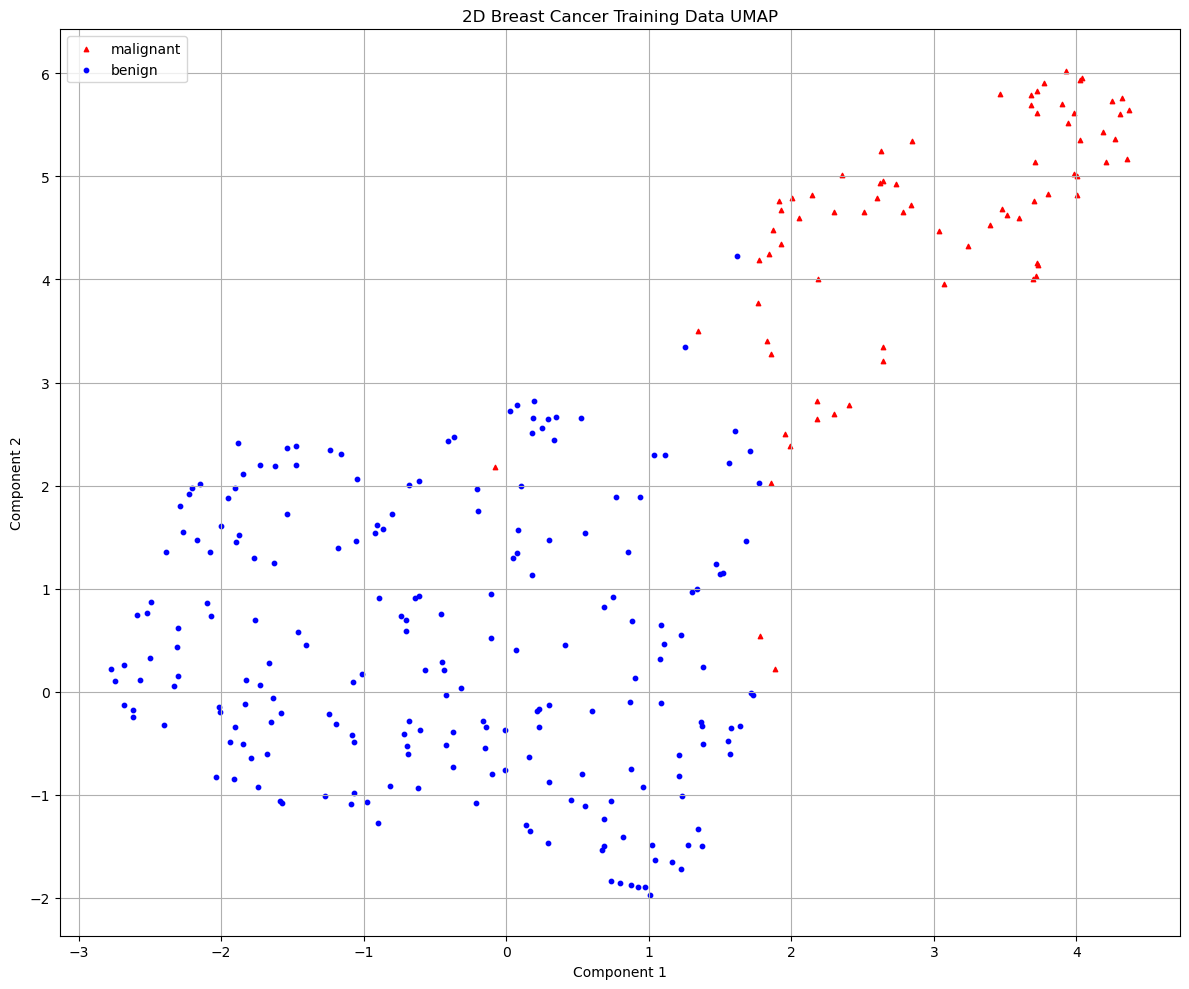

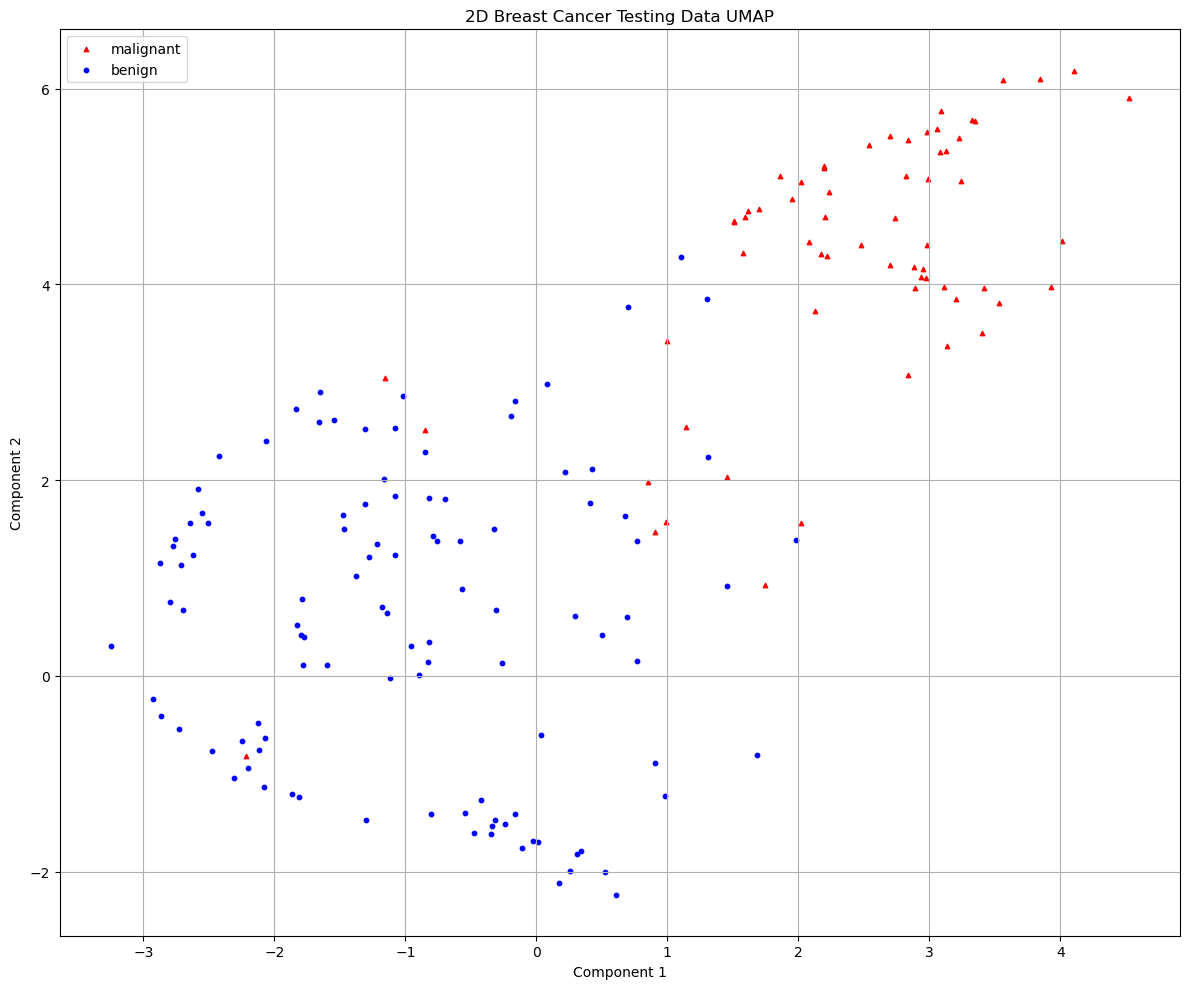

[I 2025-04-27 02:18:12,547] A new study created in memory with name: no-name-e1153729-6362-40b1-be24-e5b10fa5094e
[I 2025-04-27 02:18:12,701] Trial 0 finished with value: 0.9860254083484573 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 15, 'p': 1}. Best is trial 0 with value: 0.9860254083484573.
[I 2025-04-27 02:18:12,800] Trial 1 finished with value: 0.9756200846944949 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 10, 'p': 1}. Best is trial 0 with value: 0.9860254083484573.
[I 2025-04-27 02:18:12,981] Trial 2 finished with value: 0.9755595886267393 and parameters: {'n_neighbors': 23, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 50, 'p': 2}. Best is trial 0 with value: 0.9860254083484573.
[I 2025-04-27 02:18:13,079] Trial 3 finished with value: 0.971990320629159 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 14, 'p': 2}. Best is tr

Best trial:
Accuracy: 0.9860254083484573
Best hyperparameters:  {'n_neighbors': 6, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 15, 'p': 1}


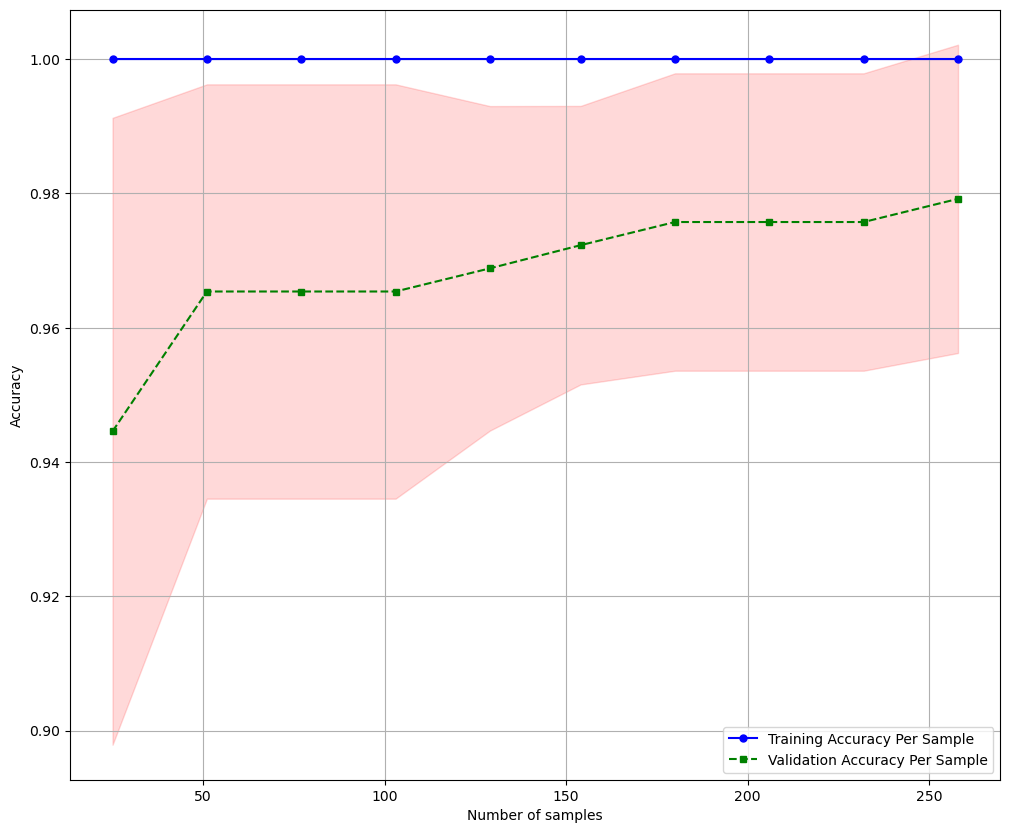

Confusion Matrix
[[ 54  10]
 [  2 105]]
Accuracy: 0.9298, Precision: 0.9130, Recall: 0.9813, F1: 0.9459, AUC:0.9403


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'dbscan', outlier_params)

helper.train_and_evaluate_model('svc', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)